# Assignment :Image Classification Using Neuron

In [ ]:
# Change the datasets shape 
#Add extra nuron with activation function "Relu" don't use "tanh" activation function
#Submit it on your gitHub repository.

In [58]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


In [59]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [61]:
from sklearn.model_selection import train_test_split
import os
os.getcwd()

'C:\\Users\\fkari653\\Downloads'

In [62]:
np.random.seed(1)

In [63]:
train_images = []
train_labels = []
shape = (250, 250)

train_datasets_path = "train_zip/train/"

for filename in os.listdir("train_zip/train/"):
    if filename.split('.')[1] =='jpg':
        img = cv2.imread(os.path.join(train_datasets_path, filename))
        train_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        train_images.append(img)
        
        
train_labels = pd.get_dummies(train_labels).values
train_images = np.array(train_images)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, random_state=1)

In [65]:
test_images = []
test_labels = []
shape = (250,250)

test_datasets_path = "test_zip/test/"

for filename in os.listdir("test_zip/test/"):
    if filename.split('.')[1] =='jpg':
        img = cv2.imread(os.path.join(test_datasets_path, filename))
        test_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        test_images.append(img)
        
        
test_images = np.array(test_images)

# Models

In [66]:
model = Sequential()
# 1st / Input Layer
model.add(Conv2D(kernel_size = (3, 3), filters = 32, activation = 'relu', input_shape = (250, 250, 3)))


# 1st Hidden Layer
model.add(Conv2D(filters = 30, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

# 2nd Hidden Layer
model.add(Conv2D(filters = 30, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(filters = 30, kernel_size = (3, 3), activation = 'relu'))
model.add(Flatten())


model.add(Dense(25, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))


In [67]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
             metrics = ['acc'])

In [68]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 246, 246, 30)      8670      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 123, 123, 30)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 121, 121, 30)      8130      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 60, 60, 30)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 58, 58, 30)        8130      
_________________________________________________________________
flatten_6 (Flatten)          (None, 100920)           

In [69]:
model_data  = model.fit(x_train, 
                        y_train,
                       epochs=5,
                       batch_size = 50,
                       validation_data=(x_test, y_test))

Epoch 1/5
4/4 [==============================] - 28s 7s/step - loss: 199.0635 - acc: 0.2667 - val_loss: 20.2736 - val_acc: 0.3000
Epoch 2/5
4/4 [==============================] - 26s 7s/step - loss: 19.5407 - acc: 0.3944 - val_loss: 4.8963 - val_acc: 0.4500
Epoch 3/5
4/4 [==============================] - 26s 6s/step - loss: 7.6280 - acc: 0.4111 - val_loss: 2.7690 - val_acc: 0.5667
Epoch 4/5
4/4 [==============================] - 26s 6s/step - loss: 3.4967 - acc: 0.5722 - val_loss: 0.7908 - val_acc: 0.7000
Epoch 5/5
4/4 [==============================] - 26s 6s/step - loss: 0.9050 - acc: 0.7167 - val_loss: 0.8400 - val_acc: 0.7500


In [70]:
model_evaluate = model.evaluate(x_test, y_test)

2/2 [==============================] - 1s 734ms/step - loss: 0.8400 - acc: 0.7500


In [71]:
print(model_evaluate)

[0.8400037288665771, 0.75]


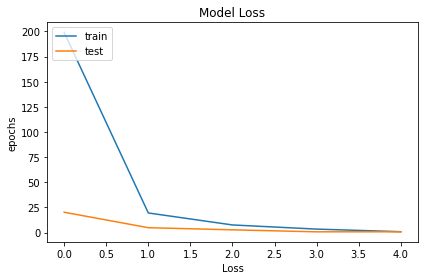

In [72]:
plt.plot(model_data.history['loss'])
plt.plot(model_data.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel('epochs')
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

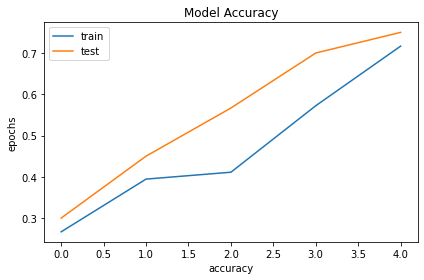

In [73]:
plt.plot(model_data.history['acc'])
plt.plot(model_data.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel("accuracy")
plt.ylabel('epochs')
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [74]:
image_name = test_images[0:1]
label_names = test_labels[0:1]

predicted = model.predict(np.array(image_name))
output = {0: 'apple', 
         1: "banana",
         2: 'mixed',
         3: 'orange'}


print("Actual values names: \t", label_names)
print("Pridicted Values names: \t", output[np.argmax(predicted)])

Actual values names: 	 ['apple']
Pridicted Values names: 	 apple


# Comment

In [ ]:

#I changed the data shape by (100,100),(150,150)(300,300).Atlast I put (250,250).It gives me the Highest Accurecy: 0.7500 and 
Loss: 0.8400037288665771.
# I also increas the Dence size by (25,15)and (25,20).Instead of activation Function tanh I use relu.
#Finally,I got the result that The acctual image and my predicted image are same: Apple

## the Model has worked proprly for the given Datasets.
